In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
from scipy import optimize
import cmath

## Bisection Mehod

In [279]:
def bisection_while(f, xinit, predicate):
    a_n, b_n = xinit
    f_1st = f(a_n)

    if f(a_n) * f(b_n) >= 0:
        print("Bisection method fails.")
        return None

    i = 1
    x_mid = 0.5 * (a_n + b_n)
    f_mid = f(x_mid)
    
    while predicate(i, (x_mid, f_mid), 0.5 * abs(a_n - b_n)):
        if f_1st * f_mid > 0:
            a_n = x_mid
            f_1st = f_mid
        else:
            b_n = x_mid

        i = i + 1
        x_mid = 0.5 * (a_n + b_n)
        f_mid = f(x_mid)
        

    return i, x_mid

In [280]:
#f_1(x) approx
f_1_approx_bisection = bisection_while(lambda x: np.sin(x) - x - 1, (-2,1), 
                                   lambda i, xy, dx: abs(dx) > 1e-6)
print(f"iteration: {f_1_approx_bisection[0]}, approx solution: {f_1_approx_bisection[1]}") 

iteration: 22, approx solution: -1.934563398361206


In [281]:
#f_2(x) approx
f_2_approx_bisection = bisection_while(lambda x: x * (1 - np.cos(x)), (-2,1),
                                   lambda i, xy, dx: abs(dx) > 1e-6)
print(f"iteration: {f_2_approx_bisection[0]}, approx solution: {f_2_approx_bisection[1]}")

iteration: 22, approx solution: 2.384185791015625e-07


In [5]:
#f_3(x) approx
f_3_approx_bisection = bisection_while(lambda x: np.exp(x) - x**2 + 3 * x - 2, (-2,1),
                                   lambda i, xy, dx: abs(dx) > 1e-6)
print(f"iteration: {f_3_approx_bisection[0]}, approx solution: {f_3_approx_bisection[1]}")

iteration: 22, approx solution: 0.25753092765808105


## Secant Method

In [242]:
def secant_while(f, xinit, predicate):

    x0, x1 = map(float, xinit)
    f0, f1 = f(x0), f(x1)
    i, x2, f2 = 0, float("nan"), float("nan")
    
    def secant_root():
        nonlocal i, x2, f2
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        f2 = f(x2)
        i += 1
        return i, (x2, f2), x2 - x1

    while predicate(*secant_root()):
        x0, x1 = x1, x2
        f0, f1 = f1, f2

        
    return i, x2

In [232]:
f_1_approx_secant = secant_while(lambda x: np.sin(x) - x - 1, (-2,1), 
                                   lambda i, xy, dx: abs(dx) > 1e-6)
print(f"iteration: {f_1_approx_secant[0]}, approx solution: {f_1_approx_secant[1]}")

iteration: 7, approx solution: -1.9345632107519628


In [243]:
f_2_approx_secant = secant_while(lambda x: x * (1 - np.cos(x)), (-2,1), 
                                   lambda i, xy, dx: abs(dx) > 1e-6)
print(f"iteration: {f_2_approx_secant[0]}, approx solution: {f_2_approx_secant[1]}")

iteration: 45, approx solution: 2.5551058010235595e-06


In [10]:
#왜 얘는 값이 좀 다를까? secant의 방식에서 차이가 존재하는 것 같은데
#확인해 볼 것

In [10]:
f_3_approx_secant = secant_while(lambda x: np.exp(x) - x**2 + 3 * x - 2, (-2,1), 
                                   lambda i, xy, dx: abs(dx) > 1e-6)
print(f"iteration: {f_3_approx_secant[0]}, approx solution: {f_3_approx_secant[1]}")

iteration: 5, approx solution: 0.2575302854397244


In [11]:
def secant_by(f, a, b, n):
    x0, x1 = a, b
    f0, f1 = f(x0), f(x1)
    iterations = n
    x2 = None
    
    for i in range(iterations):
        x2 = x1 - f1 * (x1 - x0) / float(f1 - f0)
        x0, x1 = x1, x2
        f0, f1 = f1, f(x1)
        
    return iterations, x2

In [13]:
f_1_approx_secant_by = secant_by(lambda x: np.sin(x) - x - 1, 1, 0.9,
                                   9)
print(f"iteration: {f_1_approx_secant_by[0]}, approx solution: {f_1_approx_secant_by[1]}")

iteration: 9, approx solution: -1.9345632107520243


In [14]:
f_2_approx_secant_by = secant_by(lambda x: x * (1 - np.cos(x)), 1, 0.9,
                                   45)
#i 횟수가 많아질 수록 더 정확해 진다.
print(f"iteration: {f_2_approx_secant_by[0]}, approx solution: {f_2_approx_secant_by[1]}")

iteration: 45, approx solution: 2.6043552455913054e-06


In [15]:
f_2_approx_secant_by = secant_by(lambda x: (np.exp(x) - x**2 + 3 * x - 2), 1, 0.9,
                                   6)
print(f"iteration: {f_2_approx_secant_by[0]}, approx solution: {f_2_approx_secant_by[1]}")

iteration: 6, approx solution: 0.2575302854398608


## Muller's Method

In [5]:
import cmath

def muller_while(f, x0x1x2, predicate):
    """Muller 방식으로 root값 구하는 함수
    
    :param f:
        f(x)
    :param x0x1x2:
        Three initial guesses
    :param predicate:
        A callable that accepts three arguments:
        A predicate function which takes three arguments
            - i : the iteration count 즉, 횟수
            - xy : a pair of the midpoint and the function value in the current iteration :현재 반복에서 중간점과 함수 값의 쌍
            - dx : the change of the x value :x값의 변화 정도
        and returns boolean: #불 연산자를 return 함
            - If True, the search continues.   True면 조사가 연속적이다
            - If False, the search terminates. False면 조사가 한계가 있다.
            
    이것과 비교하여 이해
    supergolden = muller_while(lambda x: x ** 3 - x ** 2 - 1, (1, 2, 3), 
                           lambda i, xy, dx: abs(xy[1]) > 1e-10) #dx값을 while을 이용하여
    """
    x0, x1, x2 = map(complex, x0x1x2)
    #Map함수에 int, complex를 넣고 만들면, 마치 변수 하나에 세개를 압축하듯, 자유자재로 정수나 복소수를 하나의 변수에 저장할 수 있다.
    
    f0, f1, f2 = f(x0), f(x1), f(x2) 
    i, x3, f3 = 0, float("nan"), float("nan")
    #일단 튜플로 나타내지만, 각각의 값은 변할 수 있음. 그리고 그걸 이용해서 계속하여 함수를 반복시킬 거다.
    
    def muller_root():
        nonlocal i, x3, f3
        
        t0   , t1,   =  x0 - x2     , x1 - x2
        term0, term1 = (f0 - f2)/t0, (f1 - f2)/t1
        denom = t0 - t1
        
        A = (term0 - term1) / denom
        B = (t0*term1 - t1*term0) / denom
        C = f2    
        #각각의 계수를 구하는 위의 공식에 똑같이 대입한 것, 어렵지 않다.
        
        sqrt_discriminant = cmath.sqrt(B**2 - 4*A*C)
        dx = -2*C / max(B + sqrt_discriminant, B - sqrt_discriminant, key = abs) 
        x3 = x2 + dx #x3을 구하는 근의 공식 완성
        f3 = f(x3) #x3을 넣었을 때 함수 값.
        i += 1 #횟수 증가
        return i, (x3, f3), dx #xy[1] = f3을 뜻함, 즉 함수 값이 원하는 만큼 작아지면, 그만큼 횟수가 증가하며 정확도가 증가하겠지.
    
    while predicate(*muller_root()):
        x0, x1, x2 = x1, x2, x3 #계산하여 나온 x1, x2, x3을 초기값으로 돌림
        f0, f1, f2 = f1, f2, f3 #계산하여 나온 f1, f2, f3값을 다시 초기값으로 돌림 
    #그리고 lambda의 조건문을 달성시킬 때 까지 다시 반복시킴
    return i, x3

In [196]:
z0z1z2 = (1 + .1j, 1 + .5j, 1 + .9j)

z_approx = muller_while(lambda z: 1j * cmath.log(z) + cmath.pi/2, z0z1z2,
                        lambda i, zf, dz: abs(zf[1]) > 1e-10)

print(f"real(z) = {z_approx.real}, imag(z) = {z_approx.imag}")

real(z) = 1.0508778904275348e-16, imag(z) = 1.0


In [17]:
f_1_approx_muller = muller_while(lambda x: np.sin(x) - x - 1, (1, 0.9, 0.95), 
                           lambda i, xy, dx: abs(xy[1]) > 1e-6 or i > 500)
print(f"iteration: {f_1_approx_muller[0]}, approx solution: {f_1_approx_muller[1]}")

iteration: 5, approx solution: (0.816463531131045-1.5635846377499045j)


In [15]:
abs(f_1_approx_muller[1]) #abs(f_1_approx_secant[1]) 
#초기 값의 정확성에 따라서 muller의 solution이 더 실근에 수렴할 것이다.

1.7639188238335899

In [16]:
f_2_approx_muller = muller_while(lambda x: x * (1 - np.cos(x)), (1, 0.9, 0.95), 
                           lambda i, xy, dx: abs(xy[1]) > 1e-6 or i > 500)
print(f"iteration: {f_2_approx_muller[0]}, approx solution: {f_2_approx_muller[1]}")

iteration: 14, approx solution: (-0.006364773235289123-0.007825774561814524j)


0.010087273458620823

In [20]:
f_3_approx_muller = muller_while(lambda x:  np.exp(x) - x**2 + 3 * x - 2, (1, 0.9, 0.95), 
                           lambda i, xy, dx: abs(xy[1]) > 1e-6 or i > 500)
print(f"iteration: {f_3_approx_muller[0]}, approx solution: {f_3_approx_muller[1]}")

iteration: 4, approx solution: (0.257530285446518+0j)


## Newton's Method

In [21]:
def newton_while(f_and_df, xinit, predicate):
    """Return the root calculated using Newton's method.
    :param f_and_df:
    이는 f와 f'을 포함하는 숫자 쌍을 return 하는 함수
    
    :param xinit:
        초기 추측 값
    
    :param prediate:
        여기서 predicate function는 세가지 인수를 취한다
        - i : 반복 횟수(iteration count)
        - xy: 중간 값의 한쌍과 현재 인수의 함수 값
        - dx: x값의 변화
    """
    
    x = xinit
    i = 0
    
    def newton_root():
        nonlocal i, x
        f, df = f_and_df(x)
        dx = -f / df #dx = 델타
        x_old = x #기존의 x는 old 에 저장
        x += dx #새로운 x에 저장 
        i += 1
        return i, (x_old, f) , dx
    
    while predicate(*newton_root()):
        pass #pass와 continue의 차이는 아래 참조
    
    
    return i, x

In [36]:
iterations = -1
def predicate(i, xy, dx):
    global iterations
    iterations = i
    print("\ti = {}, xy = {}, dx = {}".format(i, xy, dx))
    return abs(dx) > 1e-6 and i < 500 #i가 500부턴 오류가 발생

f_1_approx_newton = newton_while(lambda x : (np.sin(x) - x - 1,np.cos(x)-1), 
                        1, predicate)

if iterations >= 500:
    print(f"\n!! Exeeded maximum iterations (={500}) befor convergence !!")
    
print(f"iteration: {f_1_approx_newton[0]}, approx solution: {f_1_approx_newton[1]}")


	i = 1, xy = (1, -1.1585290151921035), dx = -2.520197577627591
	i = 2, xy = (-1.5201975776275911, -0.4785225787569186), dx = -0.5040141854424416
	i = 3, xy = (-2.0242117630700327, 0.12525550683758802), dx = 0.08710164199542941
	i = 4, xy = (-1.9371101210746033, 0.003456123890821061), dx = 0.002544679996650069
	i = 5, xy = (-1.9345654410779534, 3.0238718413677645e-06), dx = 2.230324214770129e-06
	i = 6, xy = (-1.9345632107537385, 2.3241408797503027e-12), dx = 1.7142246509540634e-12
iteration: 6, approx solution: -1.9345632107520243


In [164]:
iterations = -1
def predicate(i, xy, dx):
    global iterations
    iterations = i
    print("\ti = {}, xy = {}, dx = {}".format(i, xy, dx))
    return abs(dx) > 1e-6 and i < 500 #i가 500부턴 오류가 발생

solution = newton_while(lambda x :  (x * (1 - np.cos(x)), 1 - (np.cos(x) + x * np.sin(x))), 
                    1, predicate)

if iterations >= 500:
    print(f"\n!! Exeeded maximum iterations (={500}) befor convergence !!")
    
print(solution) 


	i = 1, xy = (1, 0.45969769413186023), dx = 1.2041117211679138
	i = 2, xy = (2.204111721167914, 3.508550100817898), dx = 18.980781818409955
	i = 3, xy = (21.18489353957787, 35.849204408521814), dx = 2.6365659468642675
	i = 4, xy = (23.821459486442137, 17.70860091813045), dx = -0.7450863838192457
	i = 5, xy = (23.07637310262289, 33.8464427231586), dx = -1.5472200946326273
	i = 6, xy = (21.529153007990264, 40.80129264649897), dx = 5.2980848743083895
	i = 7, xy = (26.827237882298654, 30.137319196293486), dx = 1.1819083884219412
	i = 8, xy = (28.009146270720596, 55.03918652555925), dx = 10.238166867958693
	i = 9, xy = (38.24731313867929, 5.604634964455572), dx = 0.28326032272315727
	i = 10, xy = (38.53057346140245, 12.56880924700018), dx = 0.4465783198396362
	i = 11, xy = (38.977151781242085, 27.72864091224877), dx = 0.75746111046766
	i = 12, xy = (39.734612891709745, 57.54203154532527), dx = 1.6887989241763408
	i = 13, xy = (41.423411815886084, 76.01096281429037), dx = -3.086148057038625


함수가 진동하는 함수일 경우 잘못된 해가 도출될 수 있다.

[-129.08936291205714, 106.25064113331551, 92.64624256292849, -2067.052491329092, 2067.052491329092, -265.42956929485155, -79.75312759155, 109.59062038028935, -21.81811153972677]


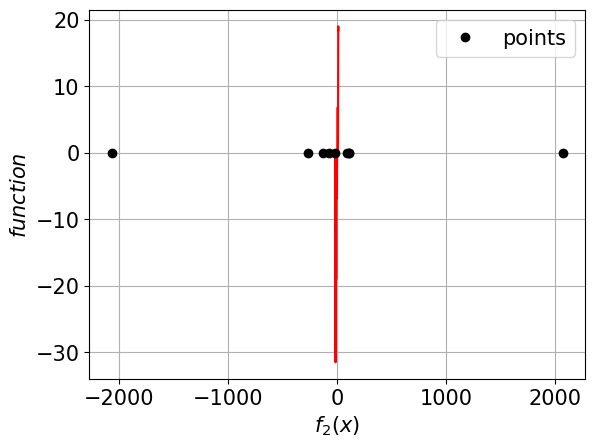

In [21]:
intervals = np.linspace(-20, 20, 10)

x_zeros = []
def f(x):
    return x * (1 - np.cos(x))

def fprime(x):
    return 1 - (np.cos(x) + x * np.sin(x))


for ab in zip(intervals[:-1], intervals[1:]):
    sol = optimize.root_scalar(f, fprime = fprime , method='newton', x0 =ab[1])
    x_zeros.append(sol.root)

x = np.linspace(-20, 10, 100)
y = x * (1 - np.cos(x))

plt.figure()
plt.plot(x, y, '-r')
plt.plot(x_zeros, np.zeros_like(x_zeros), 'ok',
         label="points")
plt.xlabel("$f_2(x)$")
plt.ylabel("$function$")
plt.grid()
plt.legend()
plt.savefig("Newtown_Method_strange.pdf")
print(x_zeros)

2.6043552455913054e-06

In [ ]:
f_2_approx_newton = newton_while(lambda x: (x * (1 - np.cos(x)), 1 - (np.cos(x) + x * np.sin(x))), 1, 
                           lambda i, xy, dx: abs(xy[1]) > 1e-6 or i > 500)
print(f"iteration: {f_2_approx_newton[0]}, approx solution: {f_2_approx_newton[1]}")

In [82]:
iterations = -1
def predicate(i, xy, dx):
    global iterations
    iterations = i
    print("\ti = {}, xy = {}, dx = {}".format(i, xy, dx))
    return abs(dx) > 1e-6 and i < 500 #i가 1028부턴 오류가 발생

f_3_approx_newton = newton_while(lambda x :   ((np.exp(x) - x**2 + 3 * x - 2), np.exp(x) - 2 * x + 3), 
                        1, predicate)

if iterations >= 500:
    print(f"\n!! Exeeded maximum iterations (={500}) befor convergence !!")
    
print(f"iteration: {f_3_approx_newton[0]}, approx solution: {f_3_approx_newton[1]}")


	i = 1, xy = (1, 2.7182818284590446), dx = -0.7310585786300048
	i = 2, xy = (0.2689414213699952, 0.04307326004788026), dx = -0.011423160112898526
	i = 3, xy = (0.2575182612570967, -4.543547480073684e-05), dx = 1.2024169252108878e-05
	i = 4, xy = (0.2575302854263488, -5.1057158501066624e-11), dx = 1.3511937484935972e-11
iteration: 4, approx solution: 0.25753028543986073


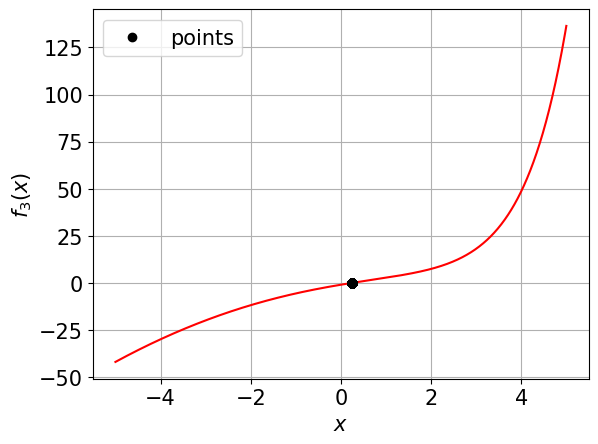

In [263]:
intervals = np.linspace(-30, 30, 200)

x_zeros = []

def f(x):
    return (np.exp(x) - x**2 + 3 * x - 2)

def fprime(x):
    return np.exp(x) - 2 * x + 3


for ab in zip(intervals[:-1], intervals[1:]):
    sol = optimize.root_scalar(f, fprime = fprime , bracket=ab, method='newton', x0 = 1)
    x_zeros.append(sol.root)

x = np.linspace(-5, 5, 1000)
y = (np.exp(x) - x**2 + 3 * x - 2)

plt.figure()
plt.plot(x, y, '-r')
plt.plot(x_zeros, np.zeros_like(x_zeros), 'ok',
         label="points")
plt.xlabel("$x$")
plt.ylabel("$f_3(x)$")
plt.grid()
plt.legend()
plt.savefig("Bisection_method.pdf")


In [166]:
def bisection_while(f, xinit, predicate):
    a_n, b_n = xinit
    f_1st = f(a_n)

    if f(a_n) * f(b_n) >= 0:
        print("Bisection method fails.")
        return None

    i = 1
    x_mid = 0.5 * (a_n + b_n)
    f_mid = f(x_mid)
    while predicate(i, (x_mid, f_mid), 0.5 * abs(a_n - b_n)):
        if f_1st * f_mid > 0:
            a_n = x_mid
            f_1st = f_mid
        else:
            b_n = x_mid

        i = i + 1
        x_mid = 0.5 * (a_n + b_n)
        f_mid = f(x_mid)
        

    return i, x_mid

In [264]:
g_1_approx_bisection = bisection_while(lambda x: (np.sin(x) - x - 1)**2, (-2,1), 
                                   lambda i, xy, dx: abs(dx) > 1e-6)
g_1_approx_bisection

#if f(a_n) * f(b_n) >= 0:
    #print("Bisection method fails.")
    #return None
    

Bisection method fails.


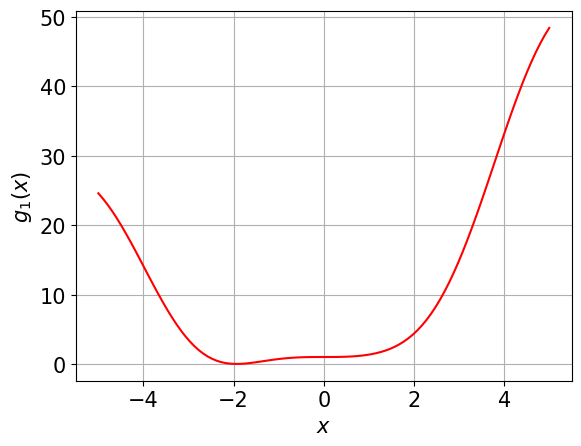

In [266]:
x = np.linspace(-5, 5, 10*10)
y = (np.sin(x) - x - 1)**2

plt.figure()
plt.plot(x, y, '-r')

plt.xlabel("$x$")
plt.ylabel("$g_1(x)$")
plt.grid()
plt.savefig("Bisectoin_Question2.pdf")

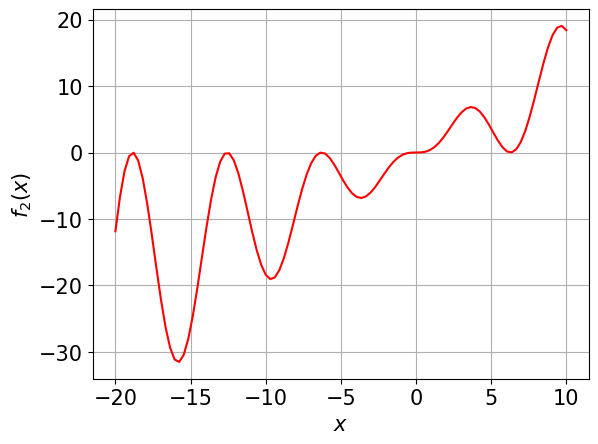

In [19]:
x = np.linspace(-20, 10, 10*10)
y = x * (1 - np.cos(x))
plt.figure()
plt.plot(x, y, '-r')

plt.xlabel("$x$")
plt.ylabel("$f_2(x)$")
plt.grid()
plt.savefig("f_2(x).pdf")

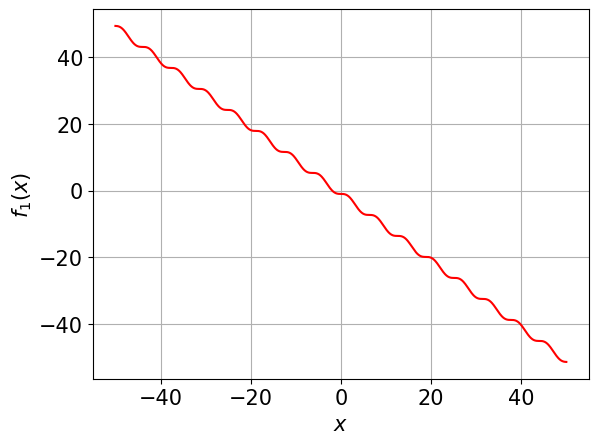

In [277]:
x = np.linspace(-50, 50, 1000)
y = np.sin(x) - x - 1
plt.figure()
plt.plot(x, y, '-r')

plt.xlabel("$x$")
plt.ylabel("$f_1(x)$")
plt.grid()
plt.savefig("Bisection_method1.pdf")